# ASE Basics

The Atomic Simulation Environment (ASE) is a useful OSS library for advancing atomistic simulations in Python. <br/>
In this section, we will introduce the basic usage of ASE.

 - Documentation: https://wiki.fysik.dtu.dk/ase/
 - gitlab: https://gitlab.com/ase/ase

## Atoms

In ASE, the `Atoms` class represents systems made up of multiple atoms.

 - https://wiki.fysik.dtu.dk/ase/ase/atoms.html

The `Atoms` class holds the following attribute (variable) to represent the structure required for atomistic simulation, as described in the previous section.

 - Element type of each atom
 - Coordinate value
 - Velocity (momentum)
 - Cell
 - Periodic boundary conditions, etc.

### How to create Atoms: Specify element and coordinates directly

The most primitive way to create `Atoms` is to directly specify the elements and their coordinates. <br/>
The following is an example of creating a hydrogen molecule, H2, with the first H at the xyz coordinate value `[0, 0, 0]` and the second H at the xyz coordinate value `[1.0, 0, 0]`.

In [1]:
from ase import Atoms

atoms = Atoms("H2", [[0, 0, 0], [1.0, 0, 0]])

You can also visualize atoms.
Here, we use the `view` method of ASE and a library called `nglviewer` to perform the visualization.

You can also interactively manipulate the atomic structure with the mouse while displaying it in 3D with `nglviewer`.
For more information on visualization, see [Appendix_1_visualization.ipynb](. /Appendix_1_visualization.ipynb).

In [2]:
from ase.visualize import view
from pfcc_extras.visualize.view import view_ngl

#view(atoms, viewer="ngl")
view_ngl(atoms, representations=["ball+stick"], w=400, h=300)

It is also possible to draw a png image using ASE as shown below.

In [3]:
from ase.io import write
from IPython.display import Image

write("output/H2.png", atoms, rotation="0x,0y,0z", scale=100)
Image(url='output/H2.png', width=150)

The following is a utility method that allows the above program to be done in one line. We will use it from now on.

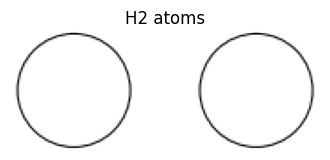

In [4]:
from pfcc_extras.visualize.ase import view_ase_atoms

view_ase_atoms(atoms, figsize=(4, 4), title="H2 atoms", scale=100)

Instead of elemental symbols `symbols`, atomic numbers can be specified as `numbers`.

In [5]:
co_atoms = Atoms(numbers=[6, 8], positions=[[0, 0, 0], [1.0, 0, 0]])
view_ngl(co_atoms, representations=["ball+stick"], w=400, h=300)

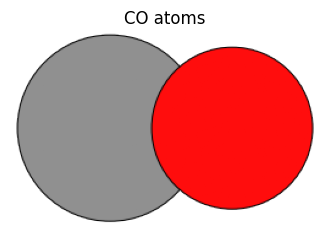

In [6]:
view_ase_atoms(co_atoms, figsize=(4, 4), title="CO atoms", scale=100)

If you want to define a system with periodic boundary conditions, you can specify periodic information in `cell` and turn on or off whether to apply periodic boundary conditions for each of the a-axis, b-axis, and c-axis in `pbc`.

In [7]:
from ase import Atoms


na2_atoms = Atoms(
    symbols="Na2",
    positions=[[0, 0, 0], [2.115, 2.115, 2.115]],
    cell=[4.23, 4.23, 4.23],
    pbc=[True, True, True]
)

In [8]:
view_ngl(na2_atoms, w=400, h=300)

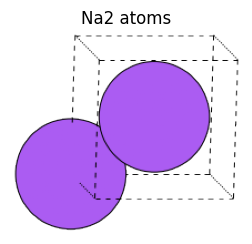

In [9]:
view_ase_atoms(na2_atoms, rotation="10x,10y,0z", figsize=(3, 3), title="Na2 atoms", scale=30)

### Attribute and method in ASE

<figure style="width:200px">
<img src="../assets/atoms.png"/>
</figure>

The `atoms` holds information about the structure and can be referenced through the attributes and `get_XXX` functions.
Attributes are variables that the `Atoms` class possesses, some of which can be referenced directly as `atoms.xxx`. <br/>

Some information can be accessed through methods.
The following is a summary of the return values (what the shape looks like as a numpy array) of the main attribute and methods.

 - Attribute
   - `symbols`: returns a summary of elemental species and their numbers.
   - `numbers`: array of atomic numbers, shape is (N,).
   - `positions`: the coordinates of each atom, shape is (N, 3) where 3 means xyz coordinates.
   - `cell`: represented by the `Cell` class of ASE.
     - The details of the Cell class are described later. In general, it is represented by a (3, 3) matrix of vectors of the a, b, and c axes respectively, for example in [triclinic crystal](https://en.wikipedia.org/wiki/Triclinic_crystal_system). In some cases like [orthorhombic crystal](https://en.wikipedia.org/wiki/Orthorhombic_crystal_system), cell can be represented by a (3,) shape vector, which represents the length of a, b, and c axes.
   - `pbc`: Indicates whether there is a periodic boundary condition in each direction.
 - Method
   - `get_masses()`: returns the mass of each atom.
   - `get_momenta()`: return the momentum for each atom.
   - `len(atoms)`: returns the number of atoms `N` in the whole `atoms`.

In [10]:
print(f"symbols  : {atoms.symbols}")
print(f"positions: {atoms.positions}")
print(f"cell     : {atoms.cell}")
print(f"pbc      : {atoms.pbc}")

# "Atomic numbers" and "Mass" can be automatically calculated from "Symbol"
print(f"numbers  : {atoms.numbers}")
print(f"massess  : {atoms.get_masses()}")
print(f"momenta  : {atoms.get_momenta()}")
print(f"Numbers of atoms  : {len(atoms)}")

symbols  : H2
positions: [[0. 0. 0.]
 [1. 0. 0.]]
cell     : Cell([0.0, 0.0, 0.0])
pbc      : [False False False]
numbers  : [1 1]
massess  : [1.008 1.008]
momenta  : [[0. 0. 0.]
 [0. 0. 0.]]
Numbers of atoms  : 2


### System of units

In ASE, energy units are often treated in eV (approximately $1.602 \times 10^{-19}$ J) and coordinate systems in Å ($1 \times 10^{-10}$ m). <br/>
The units for force and stress are these composite units: eV/Å for force and eV/Å2 for stress. 
The unit for charge is the elementary amount of charge.

 - eV: [Electronvolt](https://en.wikipedia.org/wiki/Electronvolt)
 - Å: [Angstrom](https://en.wikipedia.org/wiki/Angstrom)
 - e: [Elementary charge](https://en.wikipedia.org/wiki/Elementary_charge)

[Tips] Detailed information about each class/method can be displayed by appending ? within Jupyter.

In [11]:
Atoms?

Init signature:
Atoms(
    symbols=None,
    positions=None,
    numbers=None,
    tags=None,
    momenta=None,
    masses=None,
    magmoms=None,
    charges=None,
    scaled_positions=None,
    cell=None,
    pbc=None,
    celldisp=None,
    constraint=None,
    calculator=None,
    info=None,
    velocities=None,
)
Docstring:     
Atoms object.

The Atoms object can represent an isolated molecule, or a
periodically repeated structure.  It has a unit cell and
there may be periodic boundary conditions along any of the three
unit cell axes.
Information about the atoms (atomic numbers and position) is
stored in ndarrays.  Optionally, there can be information about
tags, momenta, masses, magnetic moments and charges.

In order to calculate energies, forces and stresses, a calculator
object has to attached to the atoms object.

Parameters:

symbols: str (formula) or list of str
    Can be a string formula, a list of symbols or a list of
    Atom objects.  Examples: 'H2O', 'COPt12', ['H', 